# Product Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


plt.style.use('ggplot')

In [3]:
df = pd.read_csv('product_info.csv')

In [4]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [5]:
df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [6]:
df.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [7]:
df.copy()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [8]:
# Converting int datatypes to boolean

df['limited_edition'] = df['limited_edition'].astype(bool)
df['new']= df['new'].astype(bool)
df['online_only']= df['online_only'].astype(bool)
df['out_of_stock'] = df['out_of_stock'].astype(bool)
df['sephora_exclusive'] = df['sephora_exclusive'].astype(bool)

df[['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']]

,limited_edition,new,online_only,out_of_stock,sephora_exclusive
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
8489,False,False,False,False,False
8490,False,False,False,False,False
8491,True,True,True,True,False
8492,True,True,True,False,False


### Checking for duplicated entries




In [9]:
# Finding duplicates entries based on a subset of columns with identical entries

dup = df.duplicated(subset=['product_id', 'product_name', 'brand_id', 'brand_name']).sum()
print('Number of duplicated records:', dup)

Number of duplicated records: 0


In [10]:
df.loc[df.duplicated(subset=['product_id', 'product_name', 'brand_id', 'brand_name'])]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price


## Product Category

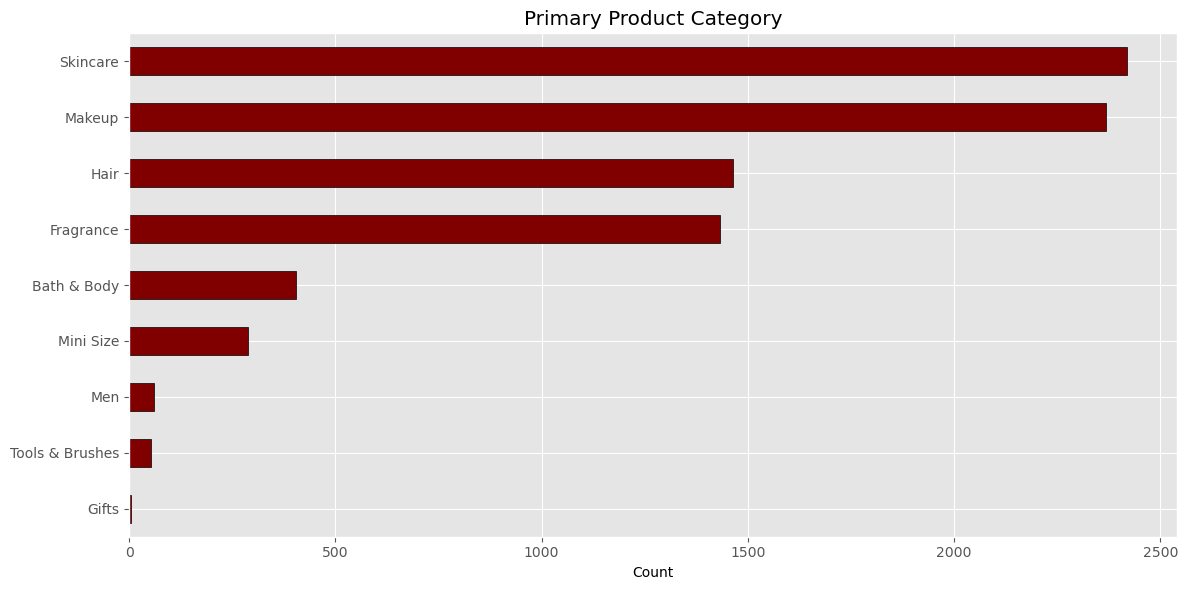

In [11]:
# Displaying major product categories

plt.figure(figsize=(12, 6))

df['primary_category'].value_counts().iloc[::-1].plot(kind='barh', color='maroon', edgecolor='black')

plt.title('Primary Product Category')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


### Secondary Product Category

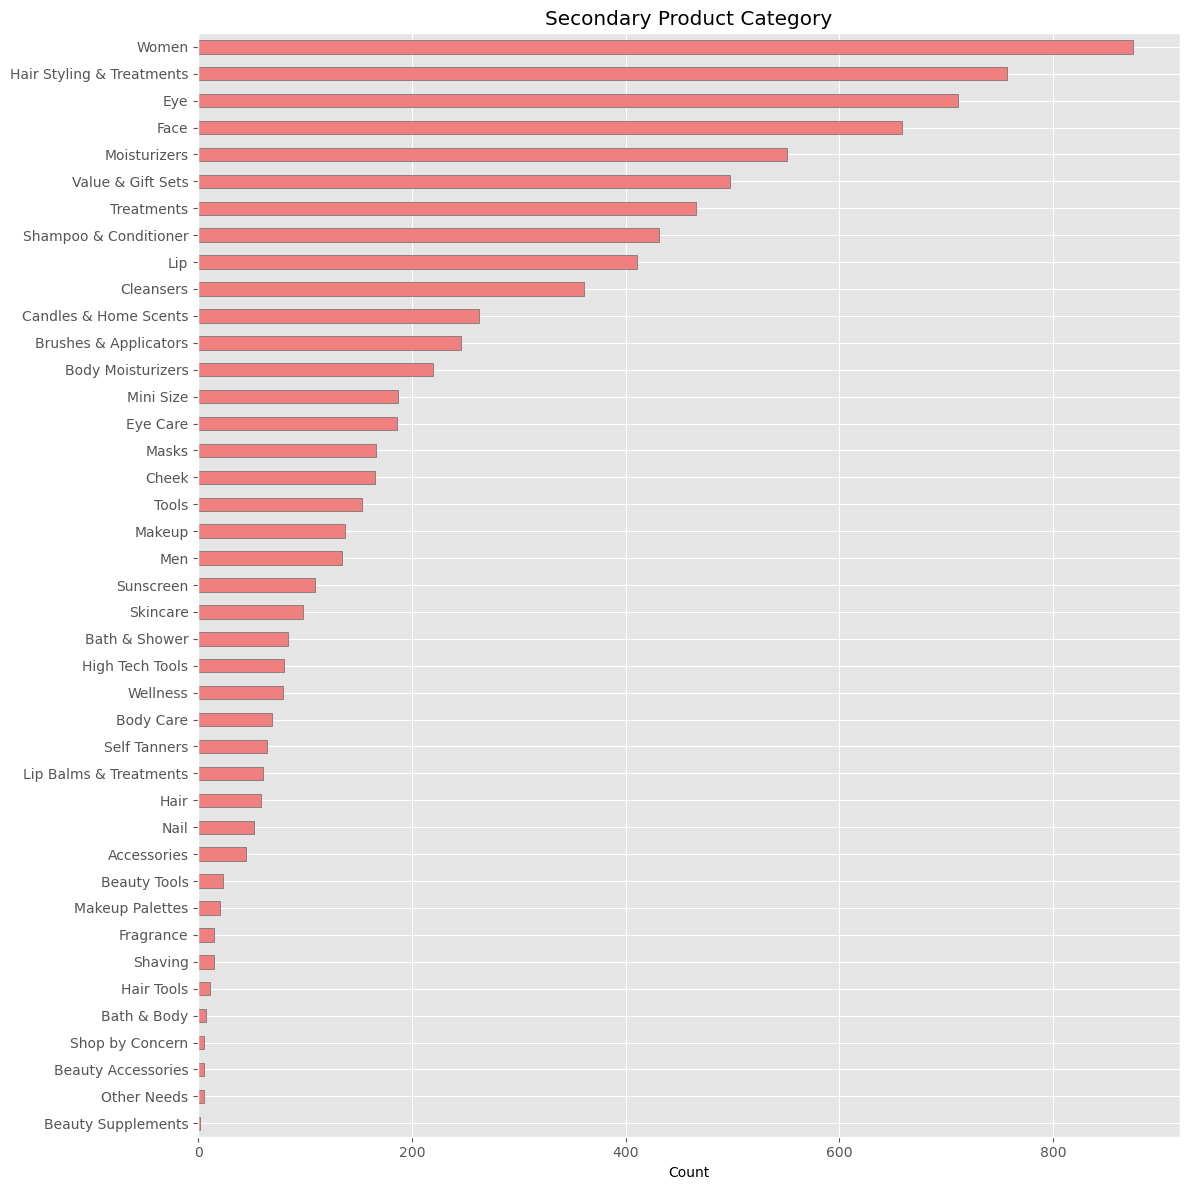

In [12]:
# Displaying a subset of product categories

plt.figure(figsize=(12, 12))

df['secondary_category'].value_counts().iloc[::-1].plot(kind='barh', color='lightcoral', edgecolor='dimgrey')

plt.title('Secondary Product Category')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

## Scatterplots

### Displaying the relationship between "rating" and "loves" (i.e. the number of likes a product has amassed) variables

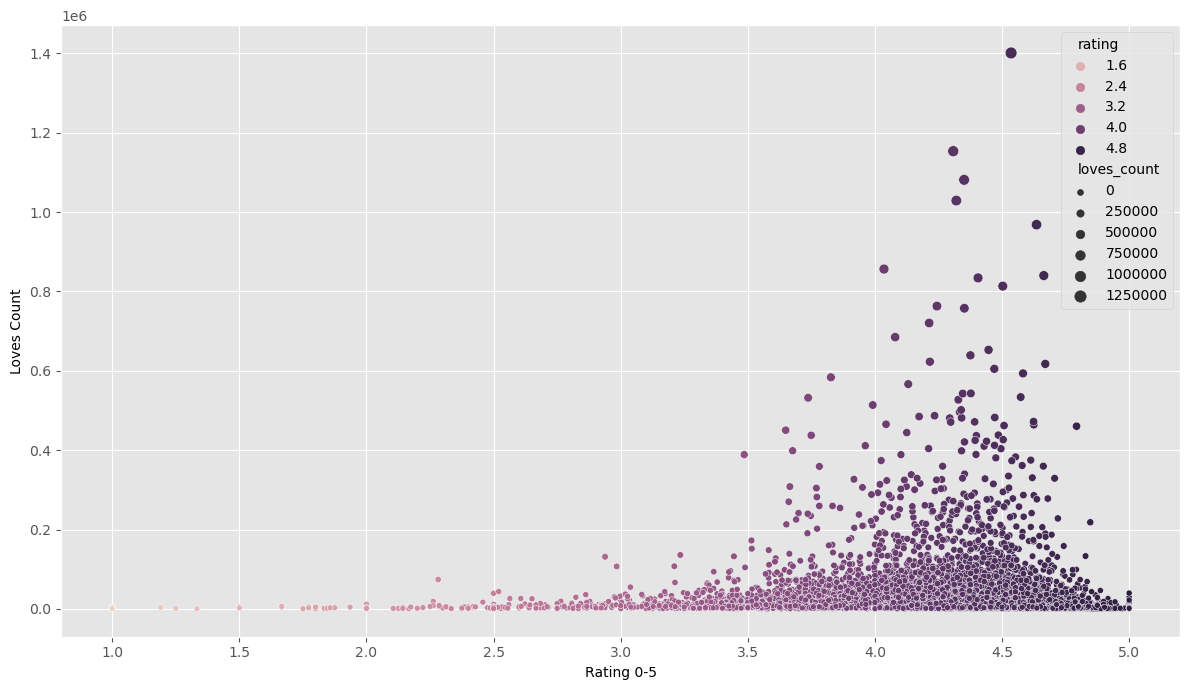

In [13]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x='rating', y='loves_count', data=df, size='loves_count', hue='rating', legend=True)

plt.xlabel('Rating 0-5')
plt.ylabel('Loves Count')
plt.tight_layout()
plt.show()

### Displaying the relationship between "rating" and number of "reviews" variables


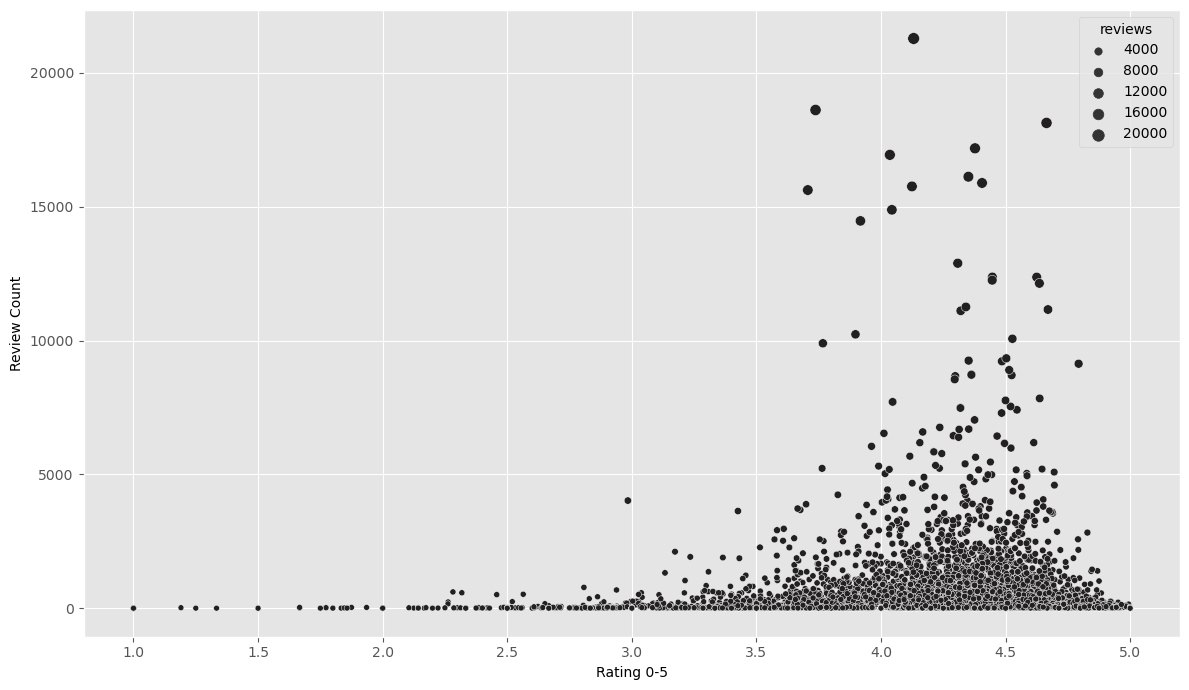

In [14]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x='rating', y='reviews', data=df, size='reviews', legend=True, color='#222021')

plt.xlabel('Rating 0-5')
plt.ylabel('Review Count')
plt.tight_layout()
plt.show()

### Displaying the relationship between "price" and "rating" variables


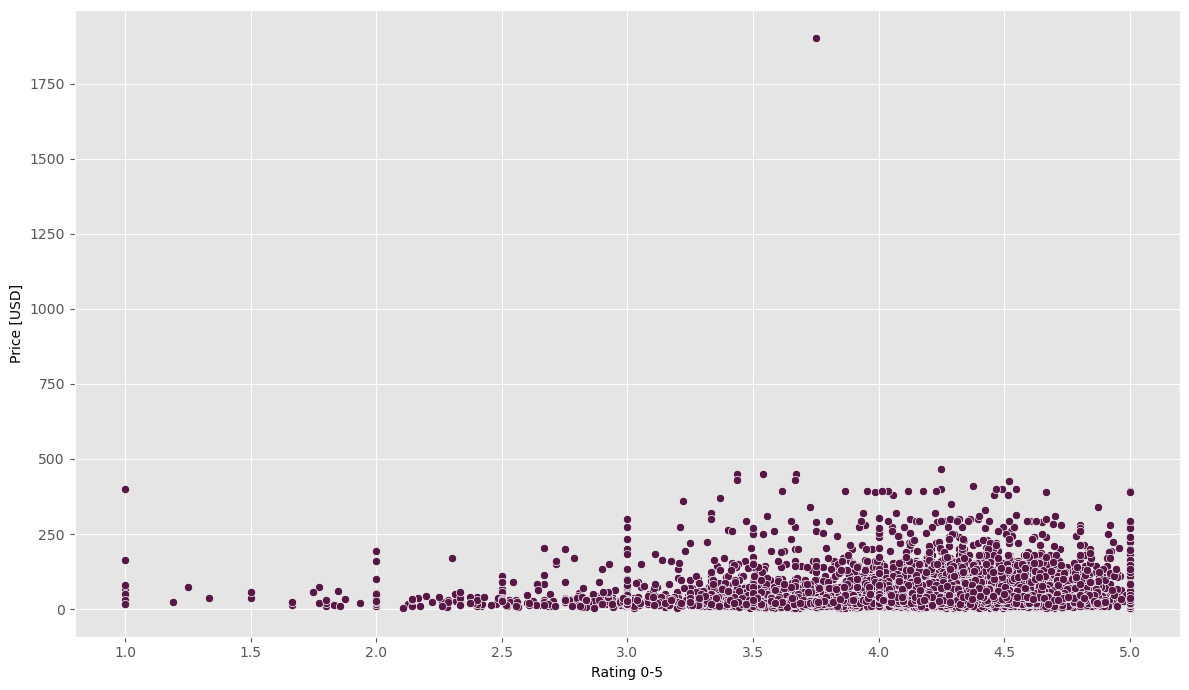

In [15]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x='rating', y='price_usd', data=df, legend=True, color='#581845')

plt.xlabel('Rating 0-5')
plt.ylabel('Price [USD]')

#plt.xscale('log')
#plt.yscale('log')

plt.tight_layout()
plt.show()

### Displaying a histogram of ratings from 0 to 5

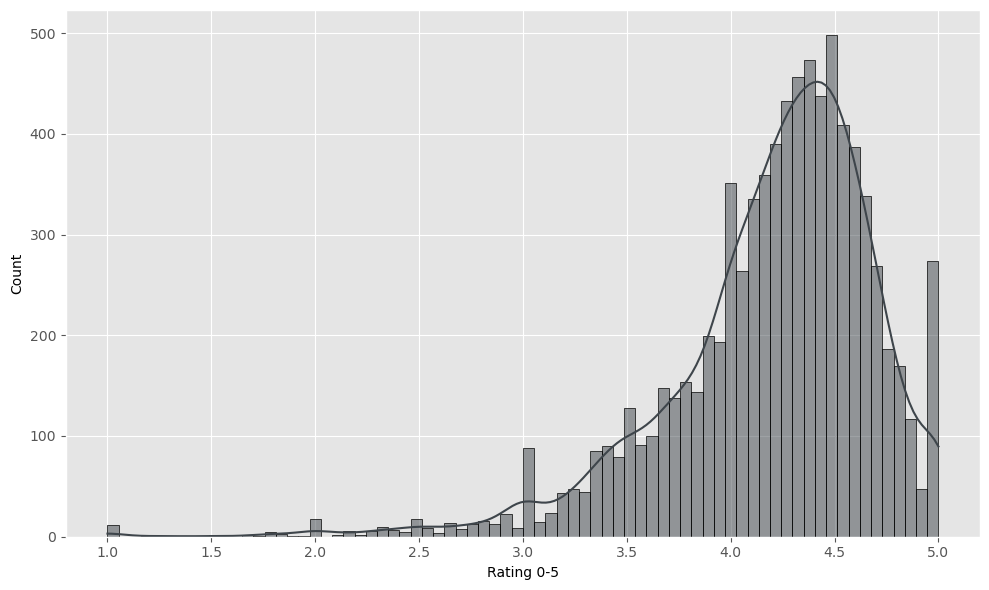

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True, color='#3E454B', edgecolor='black')

plt.xlabel('Rating 0-5')

plt.tight_layout()
plt.show()

### Corrleation Matrix for numerical values

In [17]:
# Dropping non-numerical data

df_hm = df.drop(columns=['limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'product_name', 'brand_name', 'ingredients', 'variation_type', 'variation_value', 'variation_desc'])

C:\Users\Hegel\AppData\Local\Temp\ipykernel_38464\432693693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_hm.corr(), annot=True)


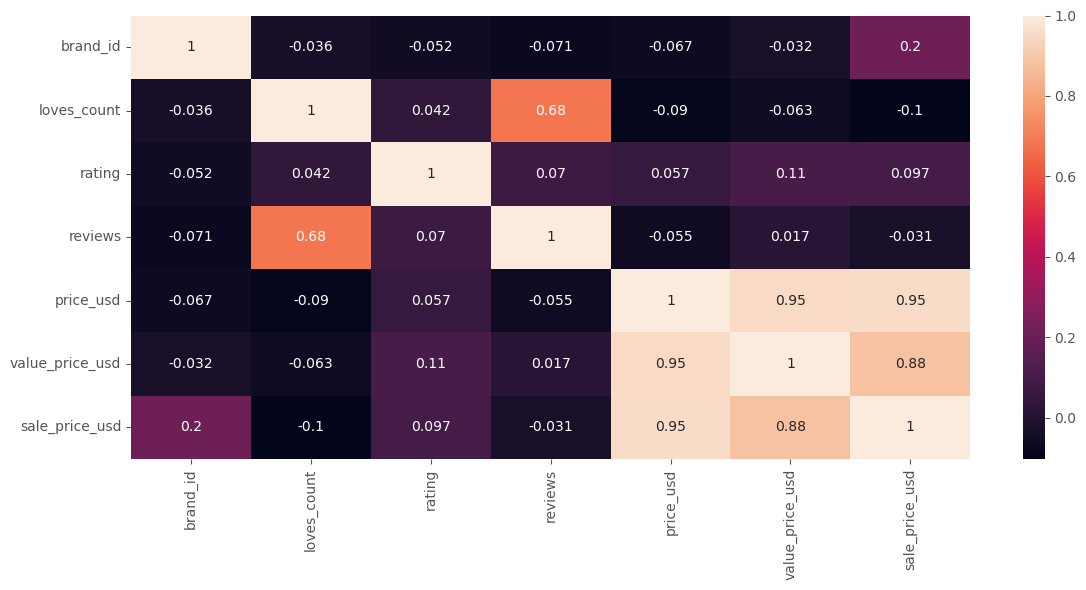

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_hm.corr(), annot=True)


plt.tight_layout()
plt.show()

### Best Reviewed Products
(Minimum of 5000 reviews)

In [19]:
df[['product_name', 'brand_name', 'reviews', 'rating', ]].query('reviews > 5000').reset_index().sort_values('rating', ascending=False).head(20)

,index,product_name,brand_name,reviews,rating
2,251,Modern Renaissance Eye Shadow Palette,Anastasia Beverly Hills,9133.0,4.7931
3,258,Ombre Effect Long Wearing Brow Powder Duo,Anastasia Beverly Hills,5086.0,4.6950
1,248,"DIPBROW Waterproof, Smudge Proof Brow Pomade",Anastasia Beverly Hills,11158.0,4.6701
48,5250,Blush,NARS,18127.0,4.6643
52,6375,Rosebud Salve,Rosebud Perfume Co.,5199.0,4.6463
76,8430,Black Opium Eau de Parfum,Yves Saint Laurent,7838.0,4.6369
25,2523,Gloss Bomb Universal Lip Luminizer,Fenty Beauty by Rihanna,12136.0,4.6357
15,987,Full-On Plumping Lip Polish Gloss,Buxom,12367.0,4.6250
62,7340,Amazonian Clay 12-Hour Blush,tarte,6187.0,4.6131
73,8185,Flowerbomb,Viktor&Rolf,5039.0,4.5850


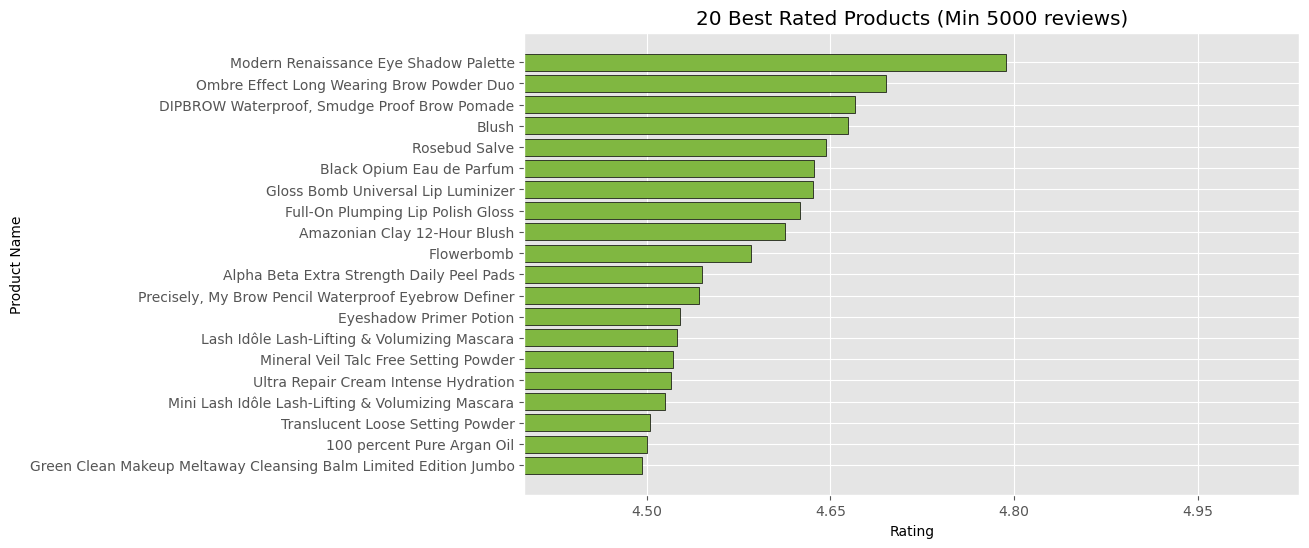

In [20]:
plt.figure(figsize=(10, 6))

brp = df[['product_name', 'brand_name', 'reviews', 'rating', ]].query('reviews > 5000').sort_values('rating', ascending=False).head(20)

plt.barh(brp['product_name'], brp['rating'], color='#80B741', edgecolor='black')

plt.title('20 Best Rated Products (Min 5000 reviews)')
plt.xlabel('Rating')
plt.ylabel('Product Name')



import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.gca().invert_yaxis()
plt.xlim(4.4)

plt.show()

### Worst Reviewed Products 
(Minimum of 5000 reviews)

In [21]:
df[['product_name', 'brand_name', 'reviews', 'rating', ]].query('reviews > 5000').reset_index().sort_values('rating', ascending=True).head(20)

,index,product_name,brand_name,reviews,rating
67,7852,Mini Better Than Sex Volumizing & Lengthening ...,Too Faced,15620.0,3.7063
65,7843,Better Than Sex Volumizing & Lengthening Mascara,Too Faced,18610.0,3.7373
12,534,BADgal BANG! Volumizing Mascara,Benefit Cosmetics,5225.0,3.7636
46,4966,Mini KUSH High Volumizing Mascara,MILK MAKEUP,9897.0,3.7667
45,4956,KUSH High Volumizing Mascara,MILK MAKEUP,10231.0,3.8976
36,4251,Lock-It Full-Coverage Long-Wear Matte Liquid F...,KVD Beauty,14468.0,3.9175
20,2228,Protini Polypeptide Firming Refillable Moistur...,Drunk Elephant,6048.0,3.9620
18,2163,Cicapair Tiger Grass Color Correcting Treatmen...,Dr. Jart+,5309.0,3.9904
31,3234,Vanish Seamless Finish Foundation Stick,Hourglass,6534.0,4.0118
19,2164,Mini Cicapair Tiger Grass Color Correcting Tre...,Dr. Jart+,5028.0,4.0165


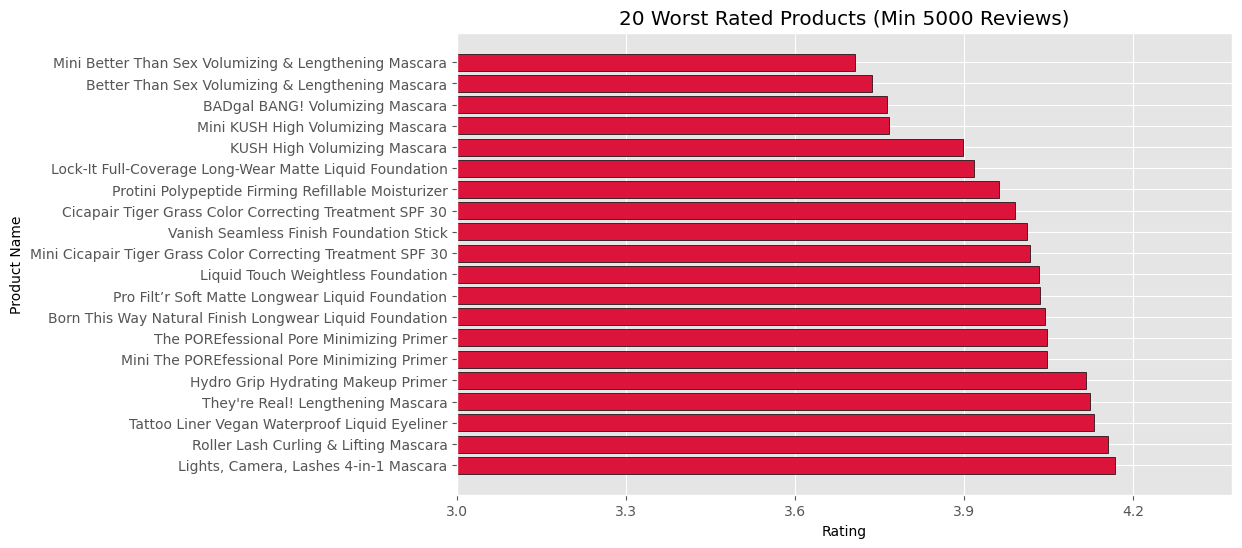

In [22]:
plt.figure(figsize=(10, 6))

wrp = df[['product_name', 'brand_name', 'reviews', 'rating', ]].query('reviews > 5000').reset_index().sort_values('rating', ascending=True).head(20)

plt.barh(wrp['product_name'], wrp['rating'], color='#DC143C', edgecolor='black')

plt.title('20 Worst Rated Products (Min 5000 Reviews)')
plt.xlabel('Rating')
plt.ylabel('Product Name')


import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.gca().invert_yaxis()
plt.xlim(3)

plt.show()

## Skincare Brand Analysis

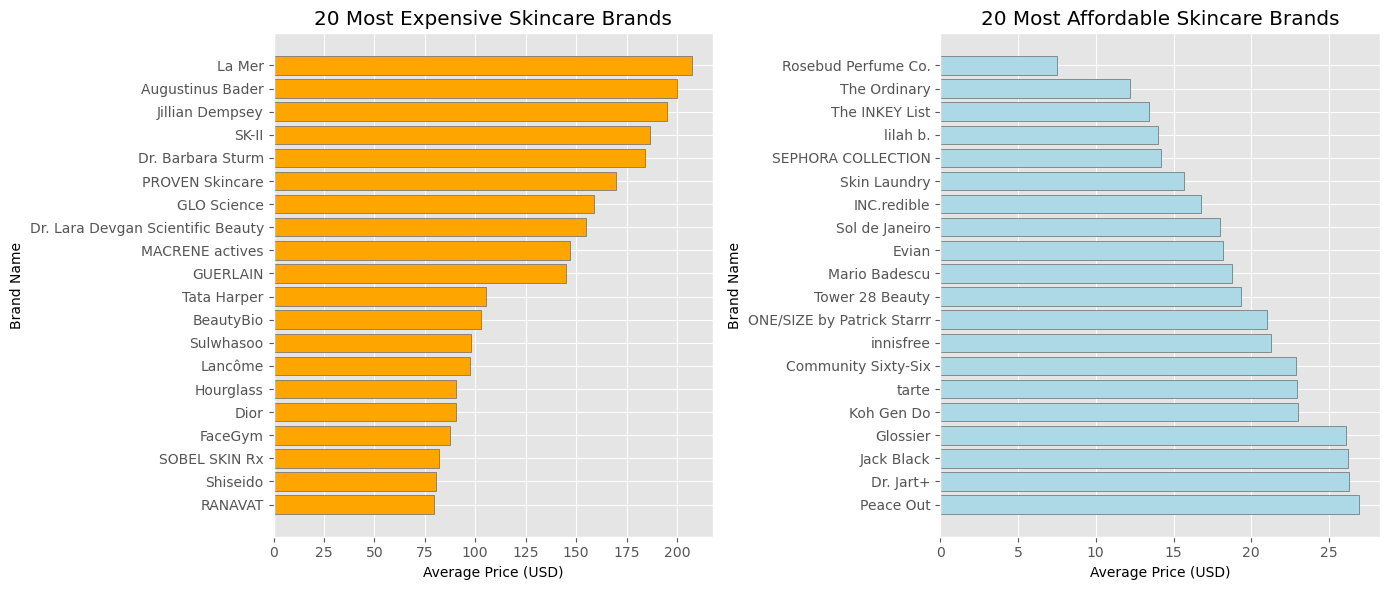

In [23]:
# Excluding high tech tools
df_avg_brands_skincare = df.query('primary_category == "Skincare" and secondary_category != "High Tech Tools"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True)

ten_lowest = df.query('primary_category == "Skincare" and secondary_category != "High Tech Tools"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).head(20)
ten_lowest = ten_lowest.iloc[::-1]
ten_highest = df.query('primary_category == "Skincare" and secondary_category != "High Tech Tools"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).tail(20)


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].barh(ten_highest.index.get_level_values('brand_name'), ten_highest.values, color='orange', edgecolor='dimgrey')
axs[0].set_xlabel('Average Price (USD)')
axs[0].set_ylabel('Brand Name')
axs[0].set_title('20 Most Expensive Skincare Brands')


axs[1].barh(ten_lowest.index.get_level_values('brand_name'), ten_lowest.values, color='lightblue', edgecolor='dimgrey')
axs[1].set_xlabel('Average Price (USD)')
axs[1].set_ylabel('Brand Name')
axs[1].set_title('20 Most Affordable Skincare Brands')


plt.tight_layout()
plt.show()

### Most Loved Skincare Products

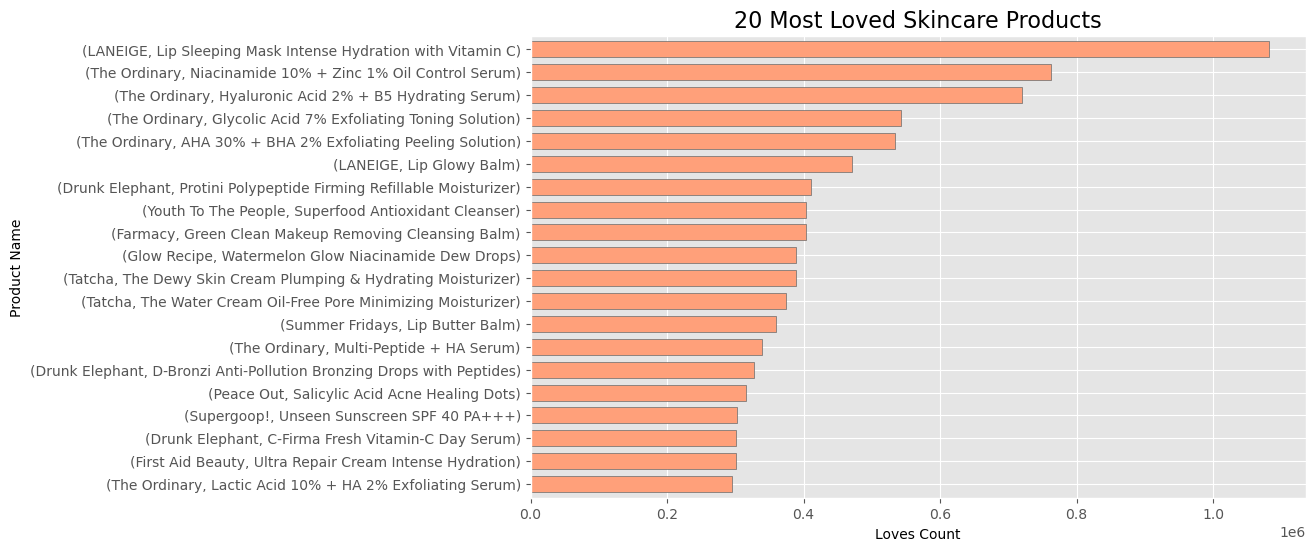

In [24]:
plt.figure(figsize=(10, 6))


df_skincare_loved_product = df.query('primary_category == "Skincare" and secondary_category !="High Tech Tools"').groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(20).iloc[::-1]
df_skincare_loved_product.plot(kind='barh',  color='lightsalmon', edgecolor='dimgrey', width=0.7)

plt.title('20 Most Loved Skincare Products', fontdict={'fontsize': 16})
plt.xlabel('Loves Count')
plt.ylabel('Product Name')


plt.show()

### Most Expensive Skincare Product

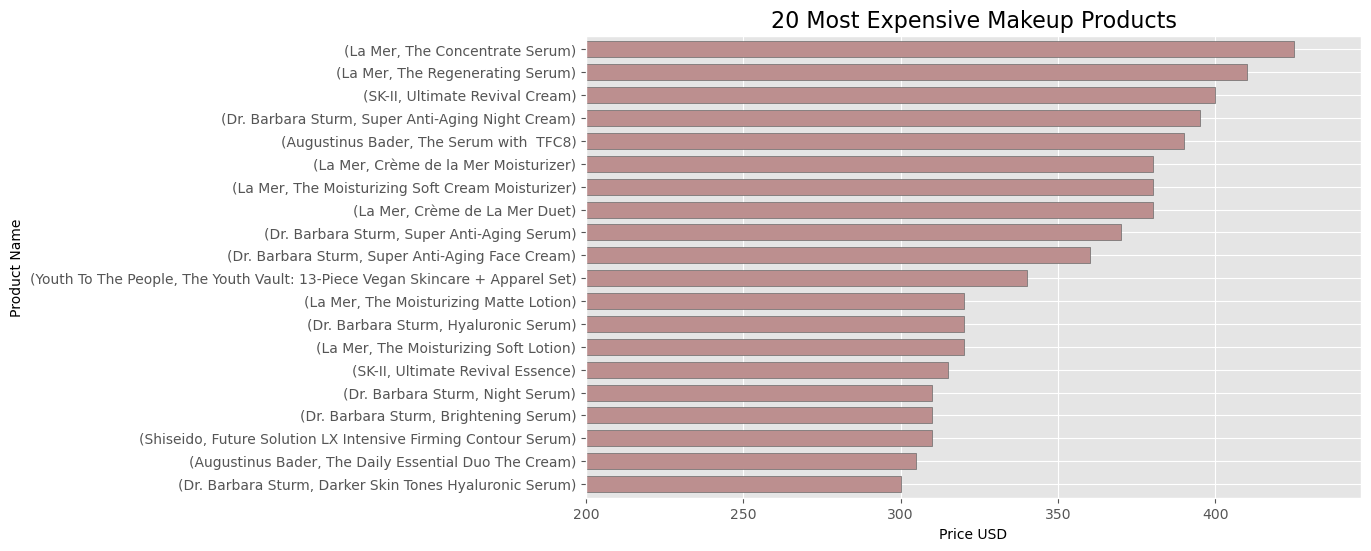

In [25]:
plt.figure(figsize=(10, 6))


makeup_price = df[['product_name', 'brand_name', 'primary_category', 'price_usd', 'secondary_category']].query('primary_category == "Skincare" and secondary_category !="High Tech Tools"').nlargest(20, 'price_usd')
makeup_plot = makeup_price.drop(columns=['primary_category', 'secondary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]


makeup_plot.plot(kind='barh', color='rosybrown', edgecolor='dimgrey', width=0.7)
plt.title('20 Most Expensive Makeup Products', fontdict={'fontsize': 16})
plt.xlabel('Price USD')
plt.ylabel('Product Name')
plt.xlim(200)

plt.show()


## Makeup Brand Analysis

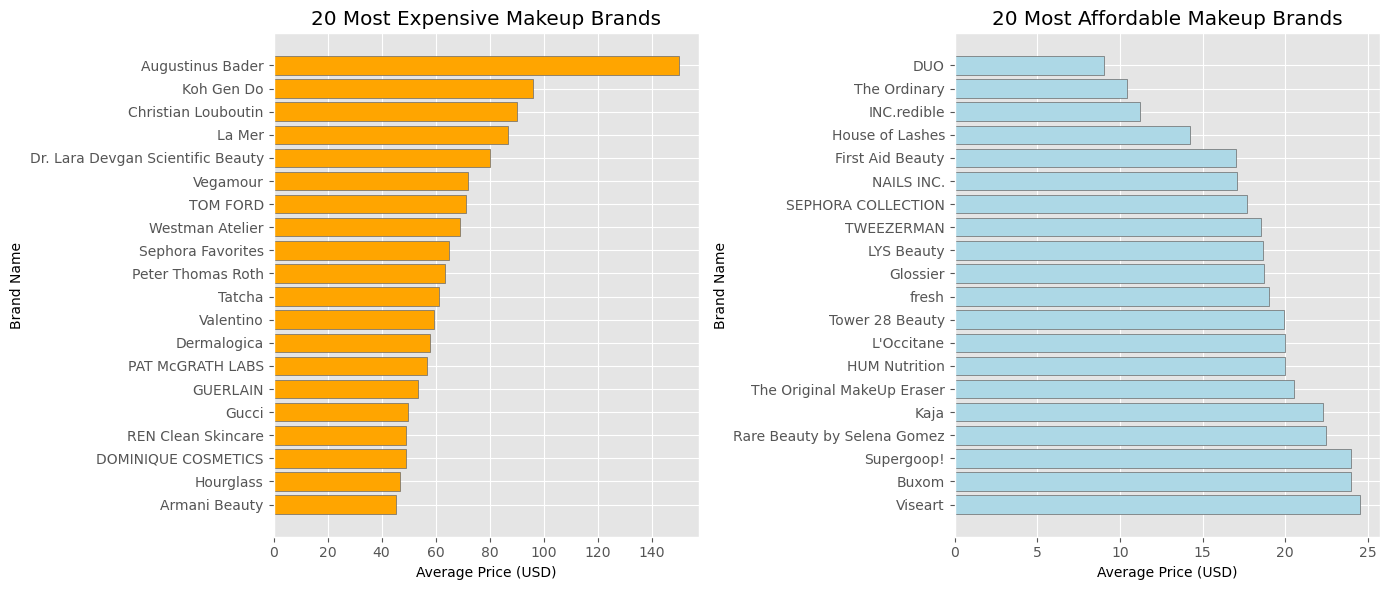

In [26]:
df_avg_brands_makeup = df.query('primary_category == "Makeup"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True)

twenty_lowest_makeup = df.query('primary_category == "Makeup"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).head(20).iloc[::-1]
twenty_highest_makeup = df.query('primary_category == "Makeup"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).tail(20)


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].barh(twenty_highest_makeup.index.get_level_values('brand_name'), twenty_highest_makeup.values, color='orange', edgecolor='dimgrey')
axs[0].set_xlabel('Average Price (USD)')
axs[0].set_ylabel('Brand Name')
axs[0].set_title('20 Most Expensive Makeup Brands')


axs[1].barh(twenty_lowest_makeup.index.get_level_values('brand_name'), twenty_lowest_makeup.values, color='lightblue', edgecolor='dimgrey')
axs[1].set_xlabel('Average Price (USD)')
axs[1].set_ylabel('Brand Name')
axs[1].set_title('20 Most Affordable Makeup Brands')


plt.tight_layout()
plt.show()

### Most Loved Makeup Products

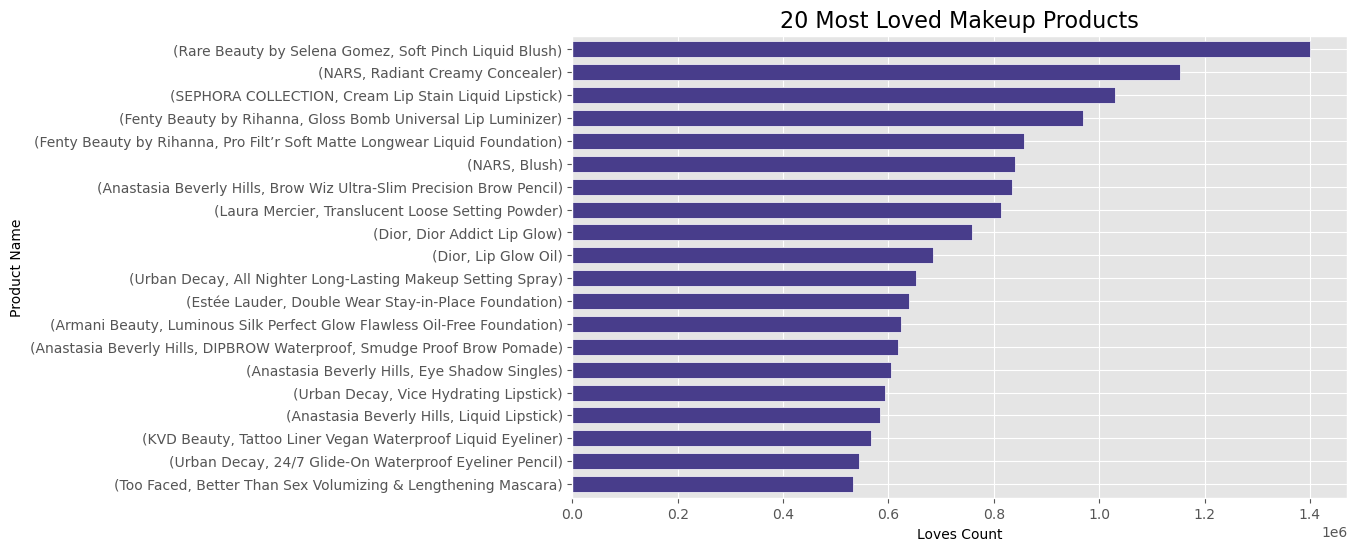

In [27]:
plt.figure(figsize=(10, 6))

df_makeup_loved_product = df.query('primary_category == "Makeup"').groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(20).iloc[::-1]
df_makeup_loved_product.plot(kind='barh', color='darkslateblue', edgecolor='white', width=0.7)

plt.title('20 Most Loved Makeup Products', fontdict={'fontsize': 16})
plt.xlabel('Loves Count')
plt.ylabel('Product Name')


plt.show()


### Most Expensive Makeup Products

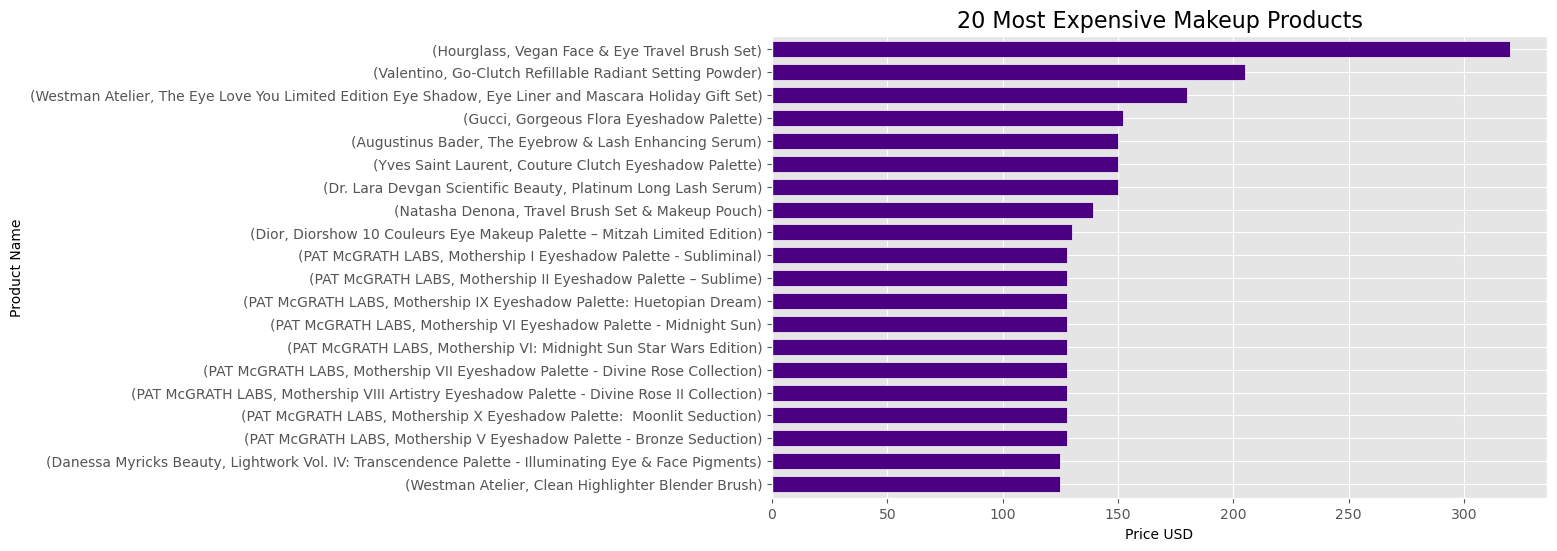

In [28]:
plt.figure(figsize=(10, 6))


makeup_price = df[['product_name', 'brand_name', 'primary_category', 'price_usd']].query('primary_category == "Makeup"').nlargest(20, 'price_usd')
makeup_plot = makeup_price.drop(columns=['primary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]


makeup_plot.plot(kind='barh', color='indigo', edgecolor='white', width=0.7)
plt.title('20 Most Expensive Makeup Products', fontdict={'fontsize': 16})
plt.xlabel('Price USD')
plt.ylabel('Product Name')


plt.show()


## Hair Product Analysis

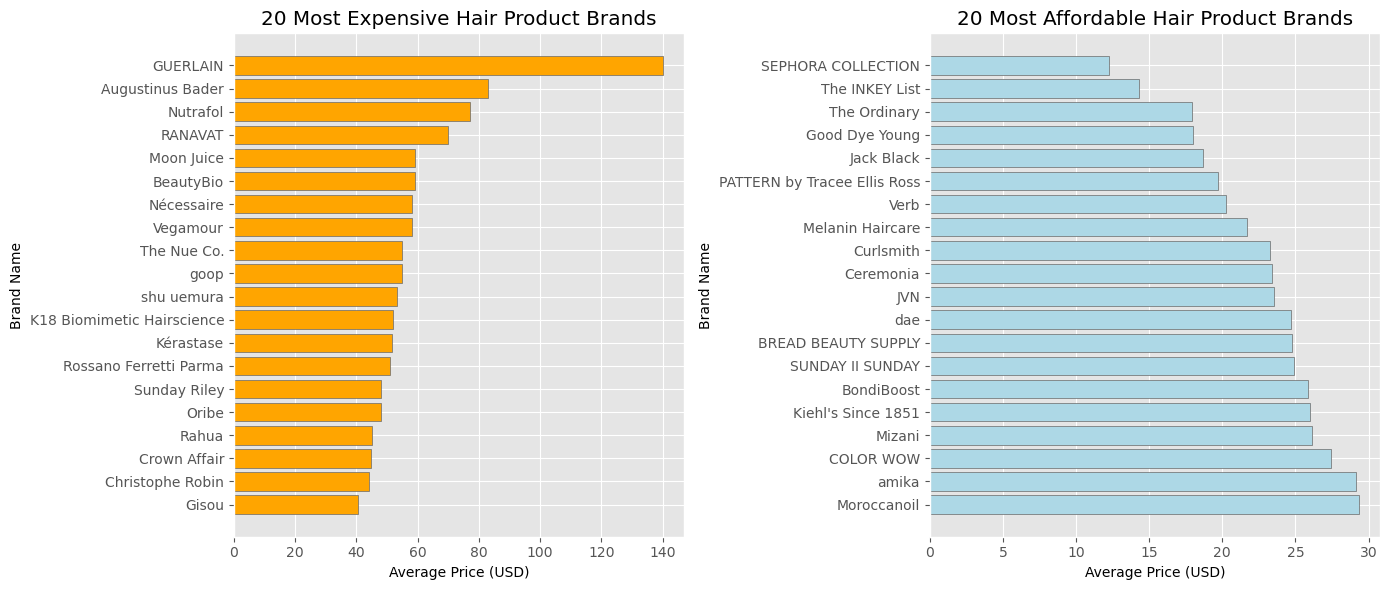

In [29]:
df_avg_brands_hair = df.query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"')\
                    .groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True)

twenty_lowest_hair = df.query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"')\
                    .groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).head(20).iloc[::-1]
twenty_highest_hair = df.query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"')\
                    .groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).tail(20)


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].barh(twenty_highest_hair.index.get_level_values('brand_name'), twenty_highest_hair.values, color='orange', edgecolor='dimgrey')
axs[0].set_xlabel('Average Price (USD)')
axs[0].set_ylabel('Brand Name')
axs[0].set_title('20 Most Expensive Hair Product Brands')


axs[1].barh(twenty_lowest_hair.index.get_level_values('brand_name'), twenty_lowest_hair.values, color='lightblue', edgecolor='dimgrey')
axs[1].set_xlabel('Average Price (USD)')
axs[1].set_ylabel('Brand Name')
axs[1].set_title('20 Most Affordable Hair Product Brands')


plt.tight_layout()
plt.show()

### Individual Hair Products

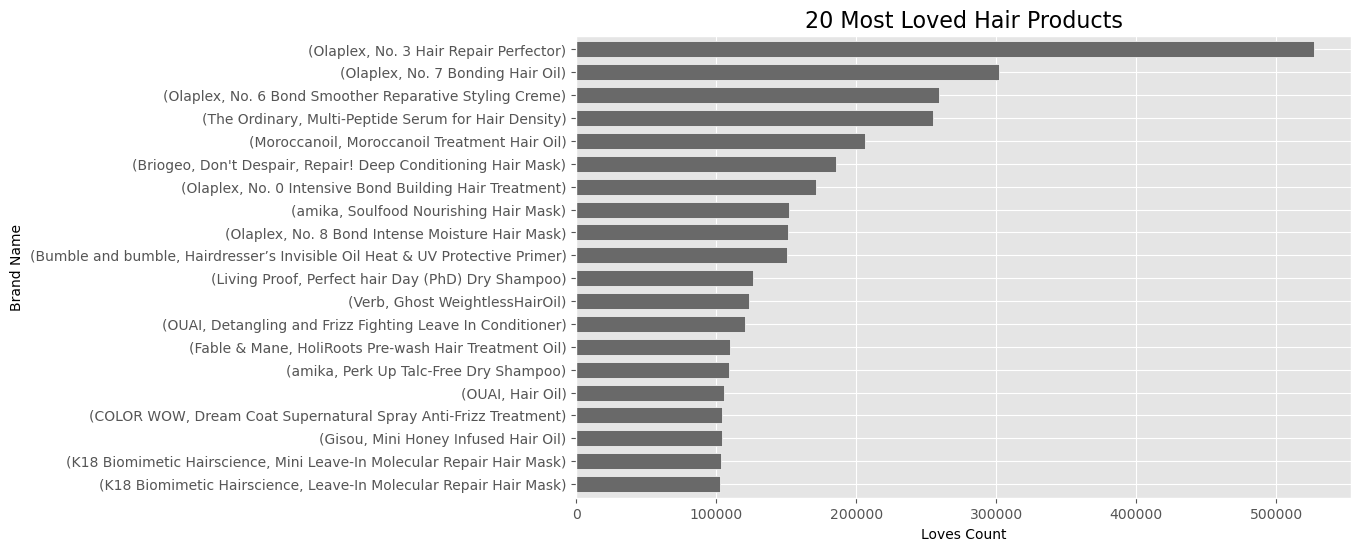

In [30]:
plt.figure(figsize=(10, 6))

df_avg_brands_hair = df.query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"')\
                    .groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(20).iloc[::-1]
df_avg_brands_hair.plot(kind='barh', color='dimgrey', edgecolor='white', width=0.7)


plt.title('20 Most Loved Hair Products', fontdict={'fontsize': 16})
plt.xlabel('Loves Count')
plt.ylabel('Brand Name')


plt.show()


### Most Expensive Hair Products

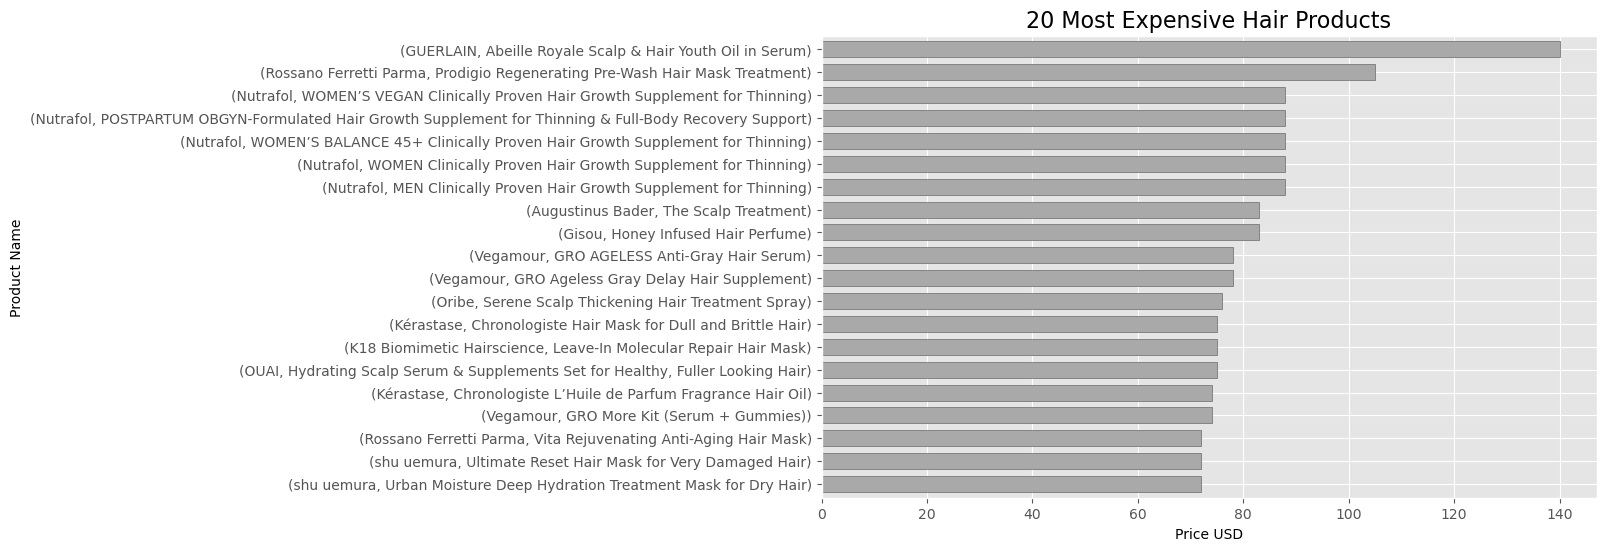

In [31]:
plt.figure(figsize=(10, 6))


hair_product_price = df[['product_name', 'brand_name', 'primary_category', 'price_usd', 'secondary_category']].query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"').nlargest(20, 'price_usd')
hair_product_plot = hair_product_price.drop(columns=['primary_category', 'secondary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]


hair_product_plot.plot(kind='barh', color='darkgrey', edgecolor='dimgrey', width=0.7)
plt.title('20 Most Expensive Hair Products', fontdict={'fontsize': 16})
plt.xlabel('Price USD')
plt.ylabel('Product Name')


plt.show()


## Fragrance Product Analysis

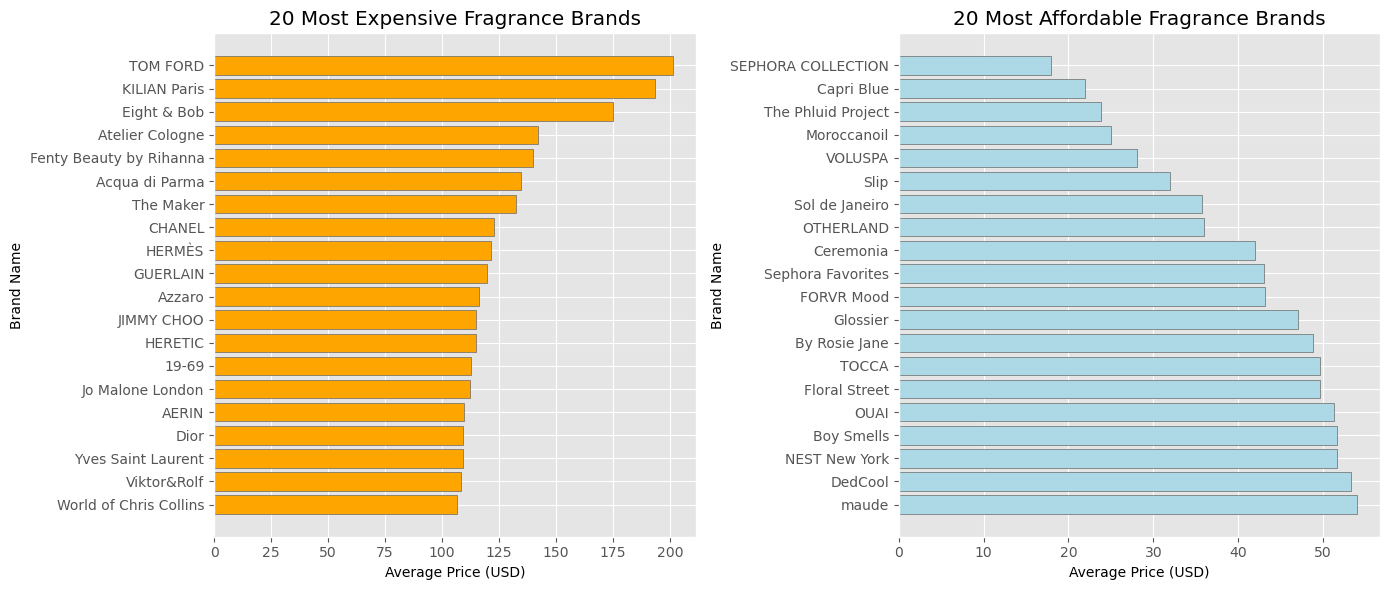

In [32]:
df_avg_brands_fragrance = df.query('primary_category == "Fragrance"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True)

twenty_lowest_fragrance = df.query('primary_category == "Fragrance"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).head(20).iloc[::-1]
twenty_highest_fragrance = df.query('primary_category == "Fragrance"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).tail(20)


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].barh(twenty_highest_fragrance.index.get_level_values('brand_name'), twenty_highest_fragrance.values, color='orange', edgecolor='dimgrey')
axs[0].set_xlabel('Average Price (USD)')
axs[0].set_ylabel('Brand Name')
axs[0].set_title('20 Most Expensive Fragrance Brands')


axs[1].barh(twenty_lowest_fragrance.index.get_level_values('brand_name'), twenty_lowest_fragrance.values, color='lightblue', edgecolor='dimgrey')
axs[1].set_xlabel('Average Price (USD)')
axs[1].set_ylabel('Brand Name')
axs[1].set_title('20 Most Affordable Fragrance Brands')


plt.tight_layout()
plt.show()

### Most Loved Fragrances

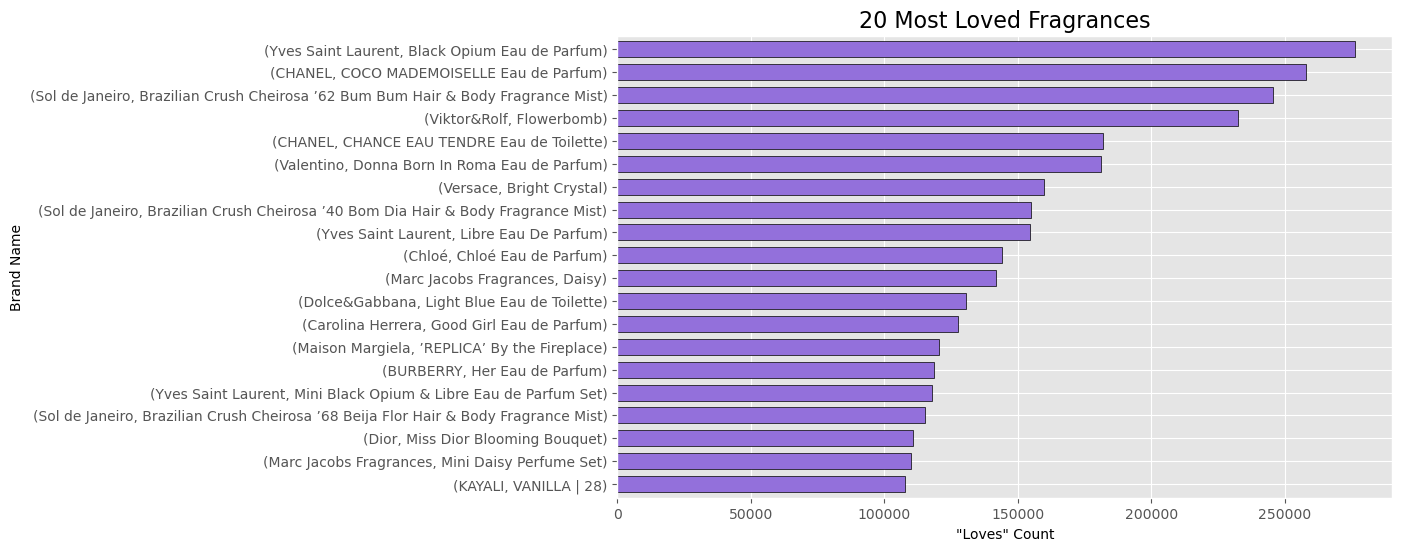

In [33]:
plt.figure(figsize=(10, 6))

df_fragrance_loves = df.query('primary_category == "Fragrance"').groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(20).iloc[::-1]

df_fragrance_loves.plot(kind='barh', color='mediumpurple', edgecolor='black', width=0.7)

plt.title('20 Most Loved Fragrances', fontdict={'fontsize': 16})
plt.xlabel('"Loves" Count')
plt.ylabel('Brand Name')


plt.show()


### Most Expensive Fragrance

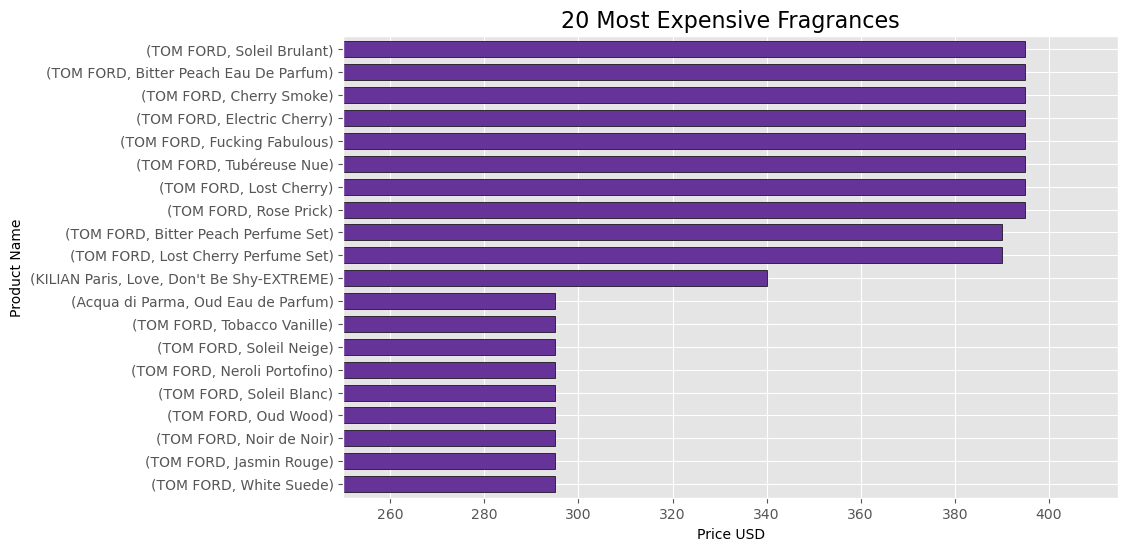

In [34]:
plt.figure(figsize=(10, 6))


fragrance_price = df[['product_name', 'brand_name', 'primary_category', 'price_usd']].query('primary_category == "Fragrance"').nlargest(20, 'price_usd')
fragrance_plot = fragrance_price.drop(columns=['primary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]


fragrance_plot.plot(kind='barh', color='rebeccapurple', edgecolor='black', width=0.7)
plt.title('20 Most Expensive Fragrances', fontdict={'fontsize': 16})
plt.xlabel('Price USD')
plt.ylabel('Product Name')
plt.xlim(250)


plt.show()


## Luxury Brand Ratings Comparison

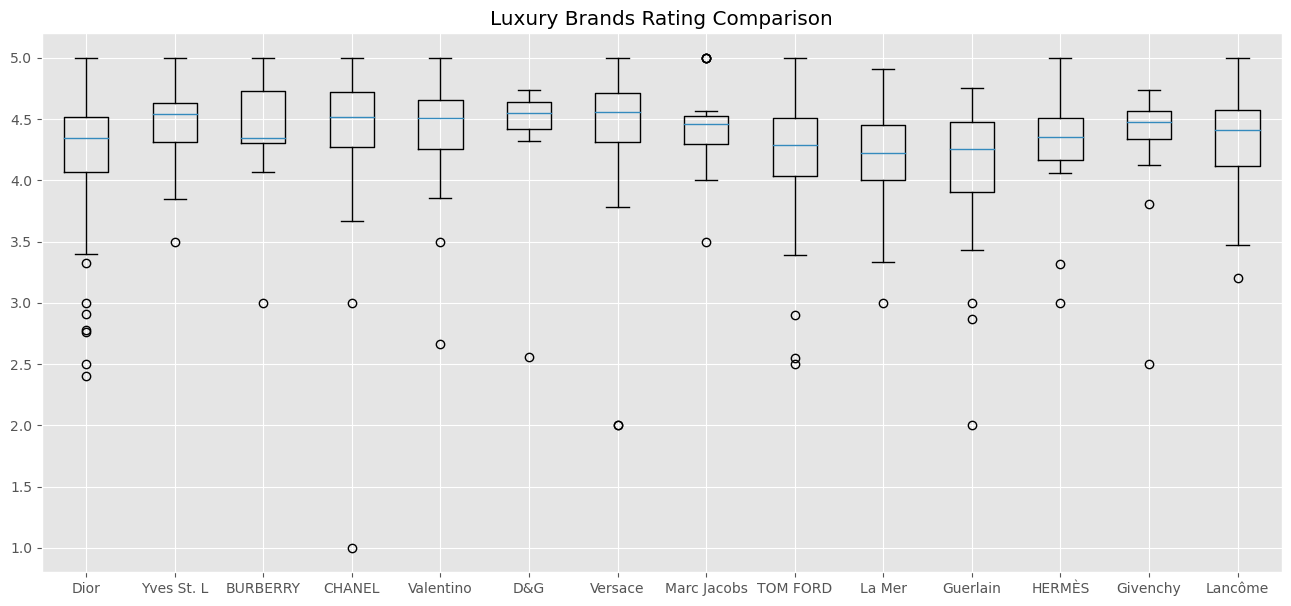

In [35]:

dr = df.query('brand_name == "Dior"')
ysl = df.query('brand_name == "Yves Saint Laurent"')
br = df.query('brand_name == "BURBERRY"')
ch = df.query('brand_name == "CHANEL"')
vt = df.query('brand_name == "Valentino"')
dg = df.query('brand_name == "Dolce&Gabbana"')
vs = df.query('brand_name == "Versace"')
mj = df.query('brand_name == "Marc Jacobs Fragrances"')
tf = df.query('brand_name == "TOM FORD"')
lm = df.query('brand_name == "La Mer"')
gr = df.query('brand_name == "GUERLAIN"')
hm = df.query('brand_name == "HERMÈS"')
gv = df.query('brand_name == "Givenchy"')
lc = df.query('brand_name == "Lancôme"')


chanel = ch['rating'].dropna()
dior = dr['rating'].dropna()
ystl = ysl['rating'].dropna()
burrberry = br['rating'].dropna()
valentino = vt['rating'].dropna()
versace = vs['rating'].dropna()
dgb = dg['rating'].dropna()
mjb = mj['rating'].dropna()
tomford = tf['rating'].dropna()
guerlain = gr['rating'].dropna()
lamer = lm['rating'].dropna()
hermes = hm['rating'].dropna()
givenchy = gv['rating'].dropna()
lancome = lc['rating'].dropna()


labels = ['Dior', 'Yves St. L', 'BURBERRY', 'CHANEL', 'Valentino', 'D&G', 'Versace', 'Marc Jacobs', 'TOM FORD', 'La Mer', 'Guerlain', 'HERMÈS', 'Givenchy', 'Lancôme']

plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Rating Comparison')
plt.boxplot([dior, ystl, burrberry, chanel, valentino, dgb, versace, mjb, tomford, lamer, guerlain, hermes, givenchy, lancome], labels=labels)


plt.show()

## Luxury Brand Price Analysis

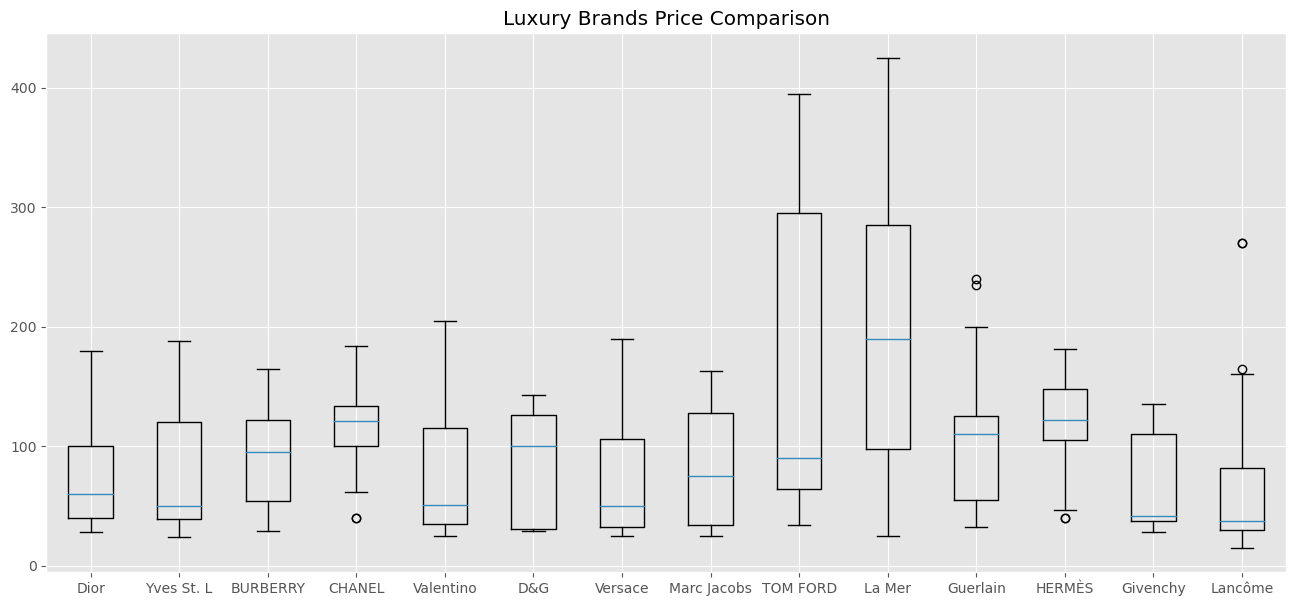

In [36]:
dr = df.query('brand_name == "Dior"')
ysl = df.query('brand_name == "Yves Saint Laurent"')
br = df.query('brand_name == "BURBERRY"')
ch = df.query('brand_name == "CHANEL"')
vt = df.query('brand_name == "Valentino"')
dg = df.query('brand_name == "Dolce&Gabbana"')
vs = df.query('brand_name == "Versace"')
mj = df.query('brand_name == "Marc Jacobs Fragrances"')
tf = df.query('brand_name == "TOM FORD"')
lm = df.query('brand_name == "La Mer"')
gr = df.query('brand_name == "GUERLAIN"')
hm = df.query('brand_name == "HERMÈS"')
gv = df.query('brand_name == "Givenchy"')
lc = df.query('brand_name == "Lancôme"')


chanel = ch['price_usd'].dropna()
dior = dr['price_usd'].dropna()
ystl = ysl['price_usd'].dropna()
burrberry = br['price_usd'].dropna()
valentino = vt['price_usd'].dropna()
versace = vs['price_usd'].dropna()
dgb = dg['price_usd'].dropna()
mjb = mj['price_usd'].dropna()
tomford = tf['price_usd'].dropna()
guerlain = gr['price_usd'].dropna()
lamer = lm['price_usd'].dropna()
hermes = hm['price_usd'].dropna()
givenchy = gv['price_usd'].dropna()
lancome = lc['price_usd'].dropna()


labels = ['Dior', 'Yves St. L', 'BURBERRY', 'CHANEL', 'Valentino', 'D&G', 'Versace', 'Marc Jacobs', 'TOM FORD', 'La Mer', 'Guerlain', 'HERMÈS', 'Givenchy', 'Lancôme']

plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Price Comparison')
plt.boxplot([dior, ystl, burrberry, chanel, valentino, dgb, versace, mjb, tomford, lamer, guerlain, hermes, givenchy, lancome], labels=labels)


plt.show()